## Load Tiny ImageNet DataSet

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/EVA4/S12

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/EVA4/S12


In [0]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import math
from torch import nn
from torch.nn import functional as F
import torchvision
import os

In [0]:
from utils.download_load import load,albumentation,TinyImageNetDataset,DatasetFromSubset
from utils.display_imgs import display_imgs
from utils.tt import train,test
from model.ResNet18 import ResNet18

In [0]:
classes, train_loader, test_loader = load('tinyimagenet', 70, batch_size=512, split=True, albumentations=True)

Images already downloaded...



CUDA Available? True


## Extract test and training data from Tiny ImageNet DataSet

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

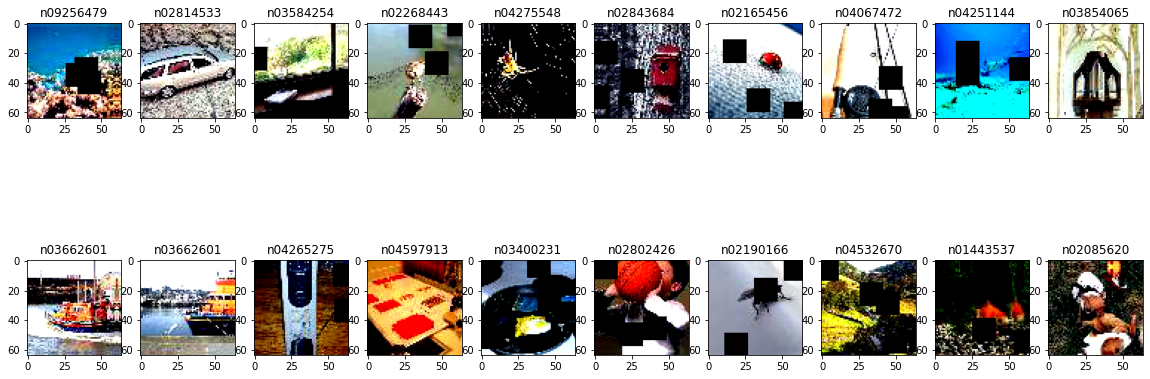

In [0]:
from utils.display_imgs import display_imgs
display_imgs(train_loader, classes)

In [0]:

!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = ResNet18(num_classes=200).to(device)
summary(model, input_size=(3,64,64))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,728
       BatchNorm2d-2           [-1, 64, 64, 64]             128
            Conv2d-3           [-1, 64, 64, 64]          36,864
       BatchNorm2d-4           [-1, 64, 64, 64]             128
            Conv2d-5           [-1, 64, 64, 64]          36,864
       BatchNorm2d-6           [-1, 64, 64, 64]             128
        BasicBlock-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
           Conv2d-10           [-1, 64, 64, 64]          36,864
      BatchNorm2d-11           [-1, 64, 64, 64]             128
       BasicBlock-12           [-1, 64, 64, 64]               0
           Conv2d-13          [-1, 128, 32, 32]          73,728
      BatchNorm2d-14          [-1,

In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1,momentum=0.9)
scheduler = OneCycleLR(optimizer, max_lr=0.03,  total_steps=24,pct_start=0.2083, final_div_factor=1, div_factor=10)
#scheduler = OneCycleLR(optimizer, max_lr = 0.03, total_steps=None, epochs=24, steps_per_epoch=1, pct_start=0.3,cycle_momentum=False, base_momentum=0.85, max_momentum=0.95, div_factor=10)

In [0]:
epoch_train_accuracy = []
epoch_test_accuracy = []
epoch_train_loss = []
epoch_test_loss = []
EPOCHS = 24
LR_list = []

for epoch in range(EPOCHS):
      print("EPOCH:", epoch+1,'LR:',optimizer.param_groups[0]['lr'])
      LR_list.append(optimizer.param_groups[0]['lr'])
      epoch_train_loss,epoch_train_accuracy = train(model, device, train_loader, optimizer, criterion, epoch)
      scheduler.step()
      epoch_test_loss , epoch_test_accuracy = test(model, device,test_loader,criterion)
      #scheduler.step()

EPOCH: 1 LR: 0.002999999999999999
Epoch Train loss: 4.985210774739583
Epoch Train Accuracy: 3.897402597402597
Epoch Test loss: 4.587280178070069
Epoch Test Accuracy: 6.596969696969697
EPOCH: 2 LR: 0.006955558344737111
Epoch Train loss: 4.292880104382832
Epoch Train Accuracy: 10.118181818181819
Epoch Test loss: 4.236398403461163
Epoch Test Accuracy: 11.166666666666666
EPOCH: 3 LR: 0.016504241998412234
Epoch Train loss: 3.8400686248143514
Epoch Train Accuracy: 15.81948051948052
Epoch Test loss: 3.740031176346999
Epoch Test Accuracy: 17.71212121212121
EPOCH: 4 LR: 0.02605043980435138
Epoch Train loss: 3.472913398742676
Epoch Train Accuracy: 21.727272727272727
Epoch Test loss: 3.548769360322219
Epoch Test Accuracy: 20.55151515151515
EPOCH: 5 LR: 0.029999999881902766
Epoch Train loss: 3.1840776284535726
Epoch Train Accuracy: 26.587012987012987
Epoch Test loss: 3.7269117648784933
Epoch Test Accuracy: 20.006060606060608
EPOCH: 6 LR: 0.02981559904845503
Epoch Train loss: 2.9640054893493653
Epo

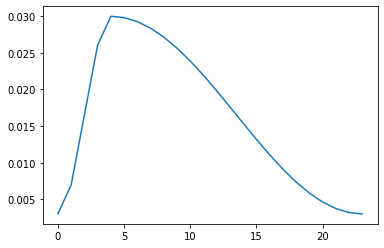

In [0]:
plt.plot(LR_list)